In [130]:
# Importing Libraries
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Data Loading & Exploration

In [2]:
df = pd.read_csv('ratings.csv')

In [3]:
df.shape

(100836, 4)

In [4]:
df.duplicated().any()

False

In [5]:
# Finding any missing Values
print(f"Missing Values\n")

print(f"{df.isnull().sum()}")

Missing Values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [6]:
# Printing data types
print("Data Types\n")
print(f"{df.dtypes}\n")

Data Types

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object



In [7]:
df.columns = ['userId', 'movieId', 'rating', 'timestamp']

In [10]:
# Getting ratings that are above 0
df = df[df['rating'] > 0]

In [9]:
df.shape

(100836, 4)

In [11]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# Getting movie title
mv_t = pd.read_csv('movies.csv')

In [13]:
mv_t.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Merging movies data with ratings data by their MovieID
df = pd.merge(df,mv_t,on='movieId')

In [19]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Exploratory Data Analysis

In [16]:
# Grouping title by its mean ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [17]:
# Grouping titles by its ratings count (given by user)
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [85]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [86]:
# Creating a new column which include how many ratings are given by users for each movie
ratings['Ratings Count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [87]:
ratings.sort_values('Ratings Count',ascending=False).head(10)

,rating,Ratings Count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [96]:
ratings_over_X = ratings[ratings['Ratings Count'] > 50]
ratings_over_X

,rating,Ratings Count
title,,
10 Things I Hate About You (1999),3.527778,54
12 Angry Men (1957),4.149123,57
2001: A Space Odyssey (1968),3.894495,109
28 Days Later (2002),3.974138,58
300 (2007),3.681250,80
...,...,...
X-Men: The Last Stand (2006),3.355769,52
X2: X-Men United (2003),3.723684,76
Young Frankenstein (1974),3.992754,69


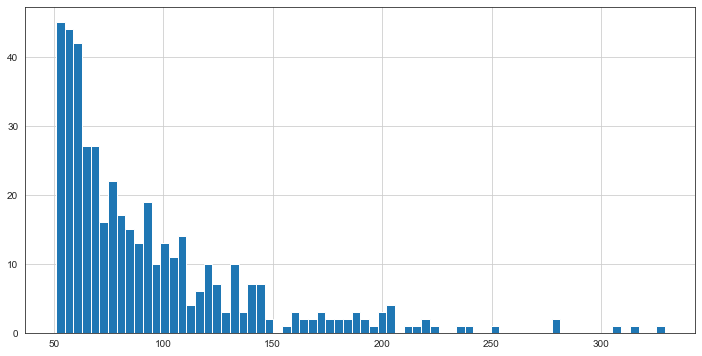

In [97]:
# Plotting ratings given by users for each movies
plt.figure(figsize=(12,6))
ratings_over_X['Ratings Count'].hist(bins=70)

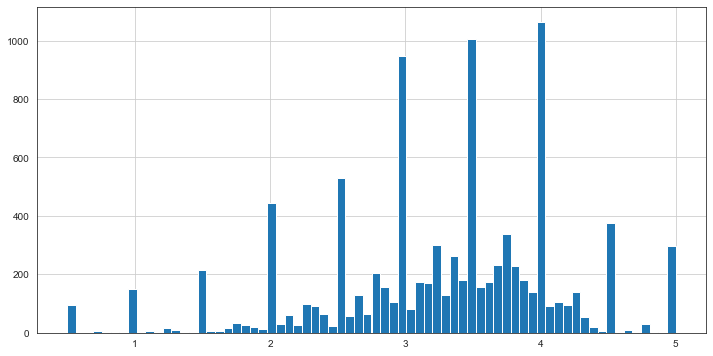

In [27]:
# Plotting distribution of ratings given by users
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=70)

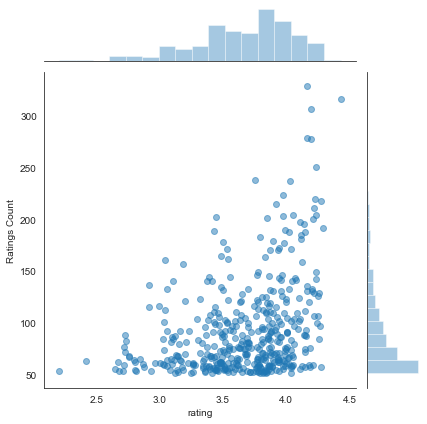

In [98]:
sns.jointplot(x='rating',y='Ratings Count',data=ratings_over_X,alpha=0.5)

## Recommending Movies

In [29]:
#Creating a matrix which has user ids on y axis and movie title on x axis. 
#Each cell now consists of rating give by a specific user to a specific movie.

In [123]:
mv_matrix = df.pivot_table(index='userId',columns='title',values='rating')

In [124]:
mv_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


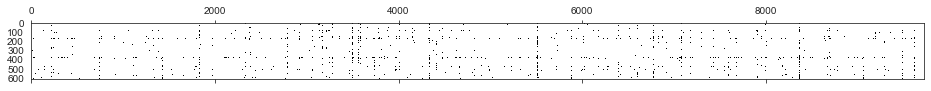

In [126]:
nan_find = np.isnan(mv_matrix)
mv_matrix[nan_find] = 0.0
plt.figure(figsize=(16,10))
plt.spy(mv_matrix)

In [32]:
# All the null values (NaN) are empty as most people have not watched all the movies

In [33]:
# Top rated movies

In [34]:
ratings.sort_values('Ratings Count',ascending=False).head(10)

,rating,Ratings Count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [35]:
#Getting user ratings for a single movie to find correlations 

In [83]:
# Creating a function 
def getRecommendation(name, num= 10, matrix=mv_matrix):
    movie = matrix[name]
    
    #Using corrwith() to get correlations of the following pandas series
    movie_one = matrix.corrwith(movie)
    
    #Clening the data further to remove NaN values
    corr_movie = pd.DataFrame(movie_one, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    #Now we can sort the dataframe by correlation so we can get the similar movies
    #corr_movie.sort_values('Correlation', ascending = False)
    
    # Joining Ratings Count to corr_Forrest_Gump dataframe
    corr_movie = corr_movie.join(ratings['Ratings Count'])
    
    #Filtering out movies that have less than 100 reviews, as it will make a lot more sense
    corr_movie = corr_movie[corr_movie['Ratings Count']>100].sort_values('Correlation',ascending=False).head(num)
    
    # Removing first row, because its the movie itself
    corr_movie = corr_movie.iloc[1:]
    
    # Dropping Ratings count column (we dont need it)
    corr_movie = corr_movie.drop('Ratings Count', 1)
    
    return corr_movie

In [84]:
getRecommendation('Toy Story (1995)', num=10)

C:\Users\psidd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\psidd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"Incredibles, The (2004)",0.643301
Finding Nemo (2003),0.618701
Aladdin (1992),0.611892
"Monsters, Inc. (2001)",0.490231
Mrs. Doubtfire (1993),0.446261
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.438237
American Pie (1999),0.420117
Die Hard: With a Vengeance (1995),0.410939
E.T. the Extra-Terrestrial (1982),0.409216


In [133]:
df.title.unique()

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)', ...,
       'Hazard (2005)', 'Blair Witch (2016)', '31 (2016)'], dtype=object)

In [135]:
for i in df.title.unique():
    print(i)

Toy Story (1995)
Grumpier Old Men (1995)
Heat (1995)
Seven (a.k.a. Se7en) (1995)
Usual Suspects, The (1995)
From Dusk Till Dawn (1996)
Bottle Rocket (1996)
Braveheart (1995)
Rob Roy (1995)
Canadian Bacon (1995)
Desperado (1995)
Billy Madison (1995)
Clerks (1994)
Dumb & Dumber (Dumb and Dumber) (1994)
Ed Wood (1994)
Star Wars: Episode IV - A New Hope (1977)
Pulp Fiction (1994)
Stargate (1994)
Tommy Boy (1995)
Clear and Present Danger (1994)
Forrest Gump (1994)
Jungle Book, The (1994)
Mask, The (1994)
Blown Away (1994)
Dazed and Confused (1993)
Fugitive, The (1993)
Jurassic Park (1993)
Mrs. Doubtfire (1993)
Schindler's List (1993)
So I Married an Axe Murderer (1993)
Three Musketeers, The (1993)
Tombstone (1993)
Dances with Wolves (1990)
Batman (1989)
Silence of the Lambs, The (1991)
Pinocchio (1940)
Fargo (1996)
Mission: Impossible (1996)
James and the Giant Peach (1996)
Space Jam (1996)
Rock, The (1996)
Twister (1996)
Independence Day (a.k.a. ID4) (1996)
She's the One (1996)
Wizard of O

GoldenEye (1995)
American President, The (1995)
Balto (1995)
Cutthroat Island (1995)
Casino (1995)
Sense and Sensibility (1995)
Ace Ventura: When Nature Calls (1995)
Copycat (1995)
Powder (1995)
Leaving Las Vegas (1995)
Othello (1995)
Now and Then (1995)
Richard III (1995)
Restoration (1995)
How to Make an American Quilt (1995)
Big Green, The (1995)
Indian in the Cupboard, The (1995)
Eye for an Eye (1996)
Mr. Holland's Opus (1995)
Bio-Dome (1996)
Lawnmower Man 2: Beyond Cyberspace (1996)
Screamers (1995)
Juror, The (1996)
White Squall (1996)
Dunston Checks In (1996)
Black Sheep (1996)
Nick of Time (1995)
Mary Reilly (1996)
Vampire in Brooklyn (1995)
Broken Arrow (1996)
City Hall (1996)
Mr. Wrong (1996)
Happy Gilmore (1996)
Bridges of Madison County, The (1995)
Rumble in the Bronx (Hont faan kui) (1995)
Before and After (1996)
Down Periscope (1996)
Up Close and Personal (1996)
Birdcage, The (1996)
Bad Boys (1995)
Amazing Panda Adventure, The (1995)
Casper (1995)
Clockers (1995)
Congo (1

Misery (1990)
Frequency (2000)
American Psycho (2000)
U-571 (2000)
Cast Away (2000)
Others, The (2001)
My Neighbor Totoro (Tonari no Totoro) (1988)
28 Days Later (2002)
The Butterfly Effect (2004)
Kill Bill: Vol. 2 (2004)
I, Robot (2004)
Apocalypto (2006)
Children of Men (2006)
Prestige, The (2006)
Ratatouille (2007)
I Am Legend (2007)
Iron Man (2008)
WALL·E (2008)
Bolt (2008)
Gran Torino (2008)
Moon (2009)
(500) Days of Summer (2009)
District 9 (2009)
9 (2009)
Cloudy with a Chance of Meatballs (2009)
Limitless (2011)
Adjustment Bureau, The (2011)
Source Code (2011)
Avengers, The (2012)
The Hunger Games (2012)
Prometheus (2012)
Looper (2012)
Oblivion (2013)
World War Z (2013)
Gravity (2013)
Captain Phillips (2013)
Captain America: The Winter Soldier (2014)
Edge of Tomorrow (2014)
Gone Girl (2014)
Guardians of the Galaxy (2014)
John Wick (2014)
Chappie (2015)
Star Wars: Episode VII - The Force Awakens (2015)
Deadpool (2016)
Doctor Strange (2016)
X-Men: Apocalypse (2016)
The Martian (201

Broadcast News (1987)
Allnighter, The (1987)
Working Girl (1988)
Say Anything... (1989)
My Blue Heaven (1990)
Young Doctors in Love (1982)
One Crazy Summer (1986)
Seventh Sign, The (1988)
Butcher's Wife, The (1991)
Mortal Thoughts (1991)
Urban Legend (1998)
Them! (1954)
Antz (1998)
My Cousin Vinny (1992)
Bride of Chucky (Child's Play 4) (1998)
Apt Pupil (1998)
Pleasantville (1998)
Vampires (1998)
Waterboy, The (1998)
Rugrats Movie, The (1998)
Bug's Life, A (1998)
Desperately Seeking Susan (1985)
Fletch (1985)
Fletch Lives (1989)
Gung Ho (1986)
Money Pit, The (1986)
Star Trek: Insurrection (1998)
Prince of Egypt, The (1998)
Shakespeare in Love (1998)
Cocoon (1985)
Clue (1985)
Back to School (1986)
Nothing in Common (1986)
Christmas Vacation (National Lampoon's Christmas Vacation) (1989)
Faculty, The (1998)
In Dreams (1999)
Boy Who Could Fly, The (1986)
Fly, The (1986)
Armed and Dangerous (1986)
Ruthless People (1986)
Deadly Friend (1986)
Jumpin' Jack Flash (1986)
Simply Irresistible (19

Star Wars: The Clone Wars (2008)
Slumdog Millionaire (2008)
Four Christmases (2008)
Terminator Salvation (2009)
Night at the Museum: Battle of the Smithsonian (2009)
Transformers: Revenge of the Fallen (2009)
Ice Age: Dawn of the Dinosaurs (2009)
Blind Side, The  (2009)
American Pie Presents: The Book of Love (American Pie 7: The Book of Love) (2009)
Leap Year (2010)
Dennis the Menace Christmas, A (2007)
How to Train Your Dragon (2010)
Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)
Grown Ups (2010)
Knight and Day (2010)
Switch, The (2010)
Red (2010)
Megamind (2010)
Black Swan (2010)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Tourist, The (2010)
Winnie the Pooh and the Honey Tree (1966)
Films to Keep You Awake: The Christmas Tale (Películas para no dormir: Cuento de navidad) (2005)
Transformers: Dark of the Moon (2011)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Friends with Benefits (2011)
Rise of the Planet of the Apes (2011)
Real Steel (2011)
Bourne Leg

Miracle (2004)
Enemy Mine (1985)
Babylon 5: In the Beginning (1998)
Animal Crackers (1930)
Children of Dune (2003)
Dune (2000)
Highway 61 (1991)
Power of One, The (1992)
Gladiator (1992)
Doctor, The (1991)
Memphis Belle (1990)
Animal Factory (2000)
Last Starfighter, The (1984)
AVP: Alien vs. Predator (2004)
Shaun of the Dead (2004)
Primer (2004)
Friday Night Lights (2004)
Vera Drake (2004)
Alexander (2004)
I Am David (2003)
House of Flying Daggers (Shi mian mai fu) (2004)
Lonesome Dove (1989)
Krays, The (1990)
Quigley Down Under (1990)
Barbarians at the Gate (1993)
Last of the Dogmen (1995)
Ripley's Game (2002)
Blueberry (2004)
Jacket, The (2005)
Starship Troopers 2: Hero of the Federation (2004)
Stander (2003)
Sergeant York (1941)
Coach Carter (2005)
Assault on Precinct 13 (2005)
Crash (2004)
Snow Walker, The (2003)
Cinderella Man (2005)
The Great Raid (2005)
Constant Gardener, The (2005)
Proof (2005)
Green Street Hooligans (a.k.a. Hooligans) (2005)
Greatest Game Ever Played, The (200

Night of the Comet (1984)
My Science Project (1985)
Mummy, The (1959)
It Came from Outer Space (1953)
Invasion of the Body Snatchers (1956)
Outrageous Fortune (1987)
Three to Tango (1999)
Flawless (1999)
Cider House Rules, The (1999)
Harry and the Hendersons (1987)
Death Wish (1974)
Honeymoon in Vegas (1992)
Pokémon the Movie 2000 (2000)
Love and Death (1975)
Hellraiser (1987)
Hellbound: Hellraiser II (1988)
Time Machine, The (1960)
Revenge of the Nerds II: Nerds in Paradise (1987)
Pokémon 3: The Movie (2001)
Freddy Got Fingered (2001)
One Night at McCool's (2001)
Nine to Five (a.k.a. 9 to 5) (1980)
Animal, The (2001)
Suspiria (1977)
Accidental Tourist, The (1988)
D.O.A. (1988)
Gorillas in the Mist (1988)
Erik the Viking (1989)
Altered States (1980)
Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001)
Moscow on the Hudson (1984)
Kate & Leopold (2001)
Conan the Destroyer (1984)
Husbands and Wives (1992)
Good Girl, The (2002)
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002)
Blow Out (1981)

Nick and Norah's Infinite Playlist (2008)
Duchess, The (2008)
Futurama: Bender's Game (2008)
Madagascar: Escape 2 Africa (2008)
Reader, The (2008)
Dear Zachary: A Letter to a Son About His Father (2008)
International, The (2009)
Away We Go (2009)
I Love You, Man (2009)
Sunshine Cleaning (2008)
Monsters vs. Aliens (2009)
Strictly Sexual (2008)
Fanboys (2009)
Drag Me to Hell (2009)
Fired Up (2009)
Stoning of Soraya M., The (2008)
Raiders of the Lost Ark: The Adaptation (1989)
Brüno (Bruno) (2009)
Open Water 2: Adrift (2006)
Winds of the Wasteland (1936)
Lost in Austen (2008)
If These Walls Could Talk (1996)
Food, Inc. (2008)
Boondock Saints II: All Saints Day, The (2009)
Ninja Assassin (2009)
Patriot, The (1998)
Crazy Heart (2009)
When in Rome (2010)
Persuasion (2007)
District 13: Ultimatum (Banlieue 13 - Ultimatum) (2009)
She's Out of My League (2010)
American Drug War: The Last White Hope (2007)
Jonah Hex (2010)
TiMER (2009)
Predators (2010)
Life as We Know It (2010)
Art of the Steal, 

Embassy (2013)
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)
Vir Das: Abroad Understanding (2017)
Oh, Hello: On Broadway (2017)
Boniface's Holiday (1965)
Little Boxes (2017)
Maz Jobrani: Immigrant (2017)
Coco (2017)
Christina P: Mother Inferior (2017)
Jack Whitehall: At Large (2017)
Hare-um Scare-um (1939)
Porky in Wackyland (1938)
Porky's Hare Hunt (1938)
Pixel Perfect (2004)
Elsa & Fred (2005)
Fred Armisen: Standup for Drummers (2018)
French Twist (Gazon maudit) (1995)
Things to Do in Denver When You're Dead (1995)
Angels and Insects (1995)
Anne Frank Remembered (1995)
Celluloid Closet, The (1995)
Flower of My Secret, The (La flor de mi secreto) (1995)
Cemetery Man (Dellamorte Dellamore) (1994)
I Shot Andy Warhol (1996)
Last Klezmer: Leopold Kozlowski, His Life and Music, The (1994)
Wild Reeds (Les roseaux sauvages) (1994)
Freeway (1996)
Single Girl, A (Fille seule, La) (1995)
Hustler White (1996)
Line King: The Al Hirschfeld Story, The (1996)
Crucibl

Family Guy Presents: Blue Harvest (2007)
Jim Norton: American Degenerate (2013)
Jim Jefferies: BARE (2014)
Tom Segura: Completely Normal (2014)
Hot Tub Time Machine 2 (2015)
Unfinished Business (2015)
The Cobbler (2015)
Trevor Noah: African American (2013)
Pixels (2015)
The Secret Life of Pets (2016)
Gabriel Iglesias: Hot and Fluffy (2007)
Kevin Hart: Laugh at My Pain (2011)
Jeff Dunham: All Over the Map (2014)
Vacation (2015)
The Night Before (2015)
The Ridiculous 6 (2015)
How to Be Single (2016)
Mr. Right (2016)
Get a Job (2016)
Neighbors 2: Sorority Rising (2016)
The Boss (2016)
Snowden (2016)
Alice Through the Looking Glass (2016)
Ali Wong: Baby Cobra (2016)
The Do-Over (2016)
Popstar: Never Stop Never Stopping (2016)
Ghostbusters (2016)
Central Intelligence (2016)
O.J.: Made in America (2016)
Jim Jefferies: Freedumb (2016)
Bad Moms (2016)
Tom Segura: Mostly Stories (2016)
Masterminds (2016)
The Girl on the Train (2016)
Keeping Up with the Joneses (2016)
Joe Rogan: Triggered (2016)

Return to Snowy River (a.k.a. The Man From Snowy River II) (1988)
Man from Snowy River, The (1982)
Chocolat (1988)
Osmosis Jones (2001)
Captain Corelli's Mandolin (2001)
Summer Catch (2001)
Father Goose (1964)
It's a Mad, Mad, Mad, Mad World (1963)
Max Keeble's Big Move (2001)
Competition, The (1980)
Fiddler on the Roof (1971)
Last Castle, The (2001)
Little Women (1933)
Joe Somebody (2001)
Shipping News, The (2001)
Rookie of the Year (1993)
Hart's War (2002)
Hopscotch (1980)
Stolen Summer (2002)
High Crimes (2002)
Full Moon in Blue Water (1988)
Iron Will (1994)
Mountains of the Moon (1990)
Hombre (1967)
Blood Work (2002)
City by the Sea (2002)
Four Feathers, The (2002)
Tom Horn (1980)
The Emperor's Club (2002)
Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002)
Zulu (1964)
Evelyn (2002)
Dark Blue (2003)
Tears of the Sun (2003)
Talent for the Game (1991)
Good Thief, The (2002)
Winged Migration (Peuple migrateur, Le) (2001)
Nevada Smith (1966)
Flight of the Phoenix, The (1965)


Taking Woodstock (2009)
Coco Before Chanel (Coco avant Chanel) (2009)
Youth in Revolt (2009)
Something Borrowed (2011)
Like Crazy (2011)
Can't Buy Me Love (1987)
Get on Up (2014)
I, the Jury (1982)
Quiet American, The (2002)
Inspector General, The (1949)
Davy Crockett, King of the Wild Frontier (1955)
Fog, The (1980)
Jaws 3-D (1983)
Eve's Bayou (1997)
Halloween II (1981)
Halloween III: Season of the Witch (1982)
Poltergeist II: The Other Side (1986)
Darby O'Gill and the Little People (1959)
Hot Lead and Cold Feet (1978)
Incredible Journey, The (1963)
Shaggy D.A., The (1976)
Son of Flubber (1963)
Needful Things (1993)
Attack of the Killer Tomatoes! (1978)
Class (1983)
Blame It on Rio (1984)
Fiendish Plot of Dr. Fu Manchu, The (1980)
Pope of Greenwich Village, The (1984)
King Kong vs. Godzilla (Kingukongu tai Gojira) (1962)
Prancer (1989)
Texas Chainsaw Massacre 2, The (1986)
Texas Chainsaw Massacre: The Next Generation (a.k.a. The Return of the Texas Chainsaw Massacre) (1994)
Soldier's 

Youngblood (1986)
Unzipped (1995)
Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)
Eyes Without a Face (Yeux sans visage, Les) (1959)
Tin Drum, The (Blechtrommel, Die) (1979)
Blood for Dracula (Andy Warhol's Dracula) (1974)
Gang Related (1997)
B. Monkey (1998)
Friday the 13th Part IV: The Final Chapter (1984)
And the Band Played On (1993)
Night Porter, The (Portiere di notte, Il) (1974)
Nashville (1975)
Peeping Tom (1960)
Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Buddy Boy (1999)
Inferno (1980)
Decline of Western Civilization Part II: The Metal Years, The (1988)
Hot Spot, The (1990)
Interiors (1978)
Phantasm III: Lord of the Dead (1994)
Original Kings of Comedy, The (2000)
Hellraiser III: Hell on Earth (1992)
Coffy (1973)
Foxy Brown (1974)
Alfie (1966)
Triumph of the Will (Triumph des Willens) (1934)
City of Women, The (Città delle donne, La) (1980)
Rififi (Du rififi chez les hommes) (1955)
Rape Me (Baise-moi) (

Big Bang, The (2011)
Think Like a Man (2012)
96 Minutes (2011) 
Bernie (2011)
Inhale (2010)
To Rome with Love (2012)
Cleanskin (2012)
2 Days in New York (2012)
Brake (2012)
ParaNorman (2012)
Conception (2011)
Lola Versus (2012)
Liberal Arts (2012)
Alex Cross (2012)
Mental (2012)
Sessions, The (Surrogate, The) (2012)
Anna Karenina (2012)
Nature Calls (2012)
Vamps (2012)
10 Years (2011)
Deadfall (2012)
Hyde Park on Hudson (2012)
How to Make Love to a Woman (2010)
Fire with Fire (2012)
Parental Guidance (2012)
Promised Land (2012)
Everything or Nothing: The Untold Story of 007 (2012)
Shadow Dancer (2012)
Why Stop Now (2012)
Liability, The (2012)
Stand Up Guys (2012)
Beautiful Creatures (2013)
Call, The (2013)
Brass Teapot, The (2012)
Host, The (2013)
Dark Tide (2012)
42 (2013)
Yongary: Monster from the Deep (1967)
English Teacher, The (2013)
Pawn (2013)
Behind the Candelabra (2013)
After Earth (2013)
Not Suitable for Children (2012)
Knot, The (2012)
Lifeguard, The (2013)
Turbo (2013)
Reve

Brave New World (1998)
Purgatory (1999)
Bleeder (1999)
Batman/Superman Movie, The (1998)
Bartleby (2001)
Teknolust (2002)
Blood: The Last Vampire (2000)
Dead or Alive: Final (2002)
Jesus Christ Vampire Hunter (2001)
Last Life in the Universe (Ruang rak noi nid mahasan) (2003)
Comic Book: The Movie (2004)
Down to the Bone (2004)
One Missed Call (Chakushin ari) (2003)
Slasher (2004)
Chase, The (1994)
Double Dragon (1994)
Gorgeous (Boh lee chun) (1999)
Seven-Per-Cent Solution, The (1976)
Class Action (1991)
If Looks Could Kill (1991)
Greedy (1994)
Walker (1987)
Frisco Kid, The (1979)
Vampire Hunter D (1985)
Los Angeles Plays Itself (2003)
Airborne (1993)
Godzilla: Final Wars (Gojira: Fainaru uôzu) (2004)
Cop and ½ (1993)
Hardware (1990)
Private Resort (1985)
Pusher II: With Blood on My Hands (2004)
Police Story 2 (Ging chaat goo si juk jaap) (1988)
Great Yokai War, The (Yôkai daisensô) (2005)
Sword of the Beast (Kedamono no ken) (1965)
Samurai Rebellion (Jôi-uchi: Hairyô tsuma shimatsu) (